#Exercise 1 - Perceptron exercise


##To solve both exercises present in the "Perceptron Exercise" task, we define the libraries that will be used as shown below:


In [ ]:
#import
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

###Exercise 1


As exercise 1 does not require any type of training for the perceptron, a priori it will not be necessary to declare dedicated functions to train the perceptron and classify samples, the code necessary to solve the first exercise can be seen below, as well as the requested plots:


Text(3, 0.3, 'Figura 1: Reta definida manualmente')

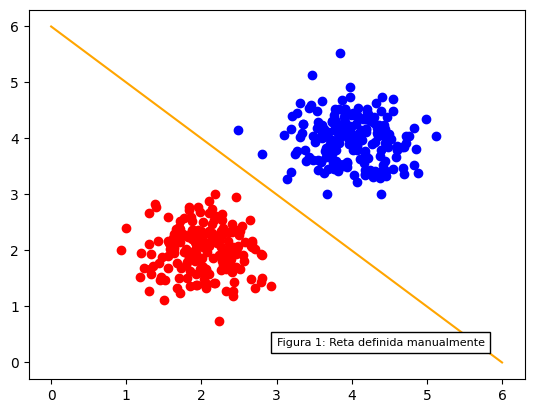

In [ ]:
s1 = 0.4
s2 = 0.4
nc = 200

xc1 = np.random.normal(size=(nc, 2)) * s1 + np.array([[2, 2]])
xc2 = np.random.normal(size=(nc, 2)) * s2 + np.array([[4, 4]])

plt.scatter(xc1[:, 0], xc1[:, 1], color='red')
plt.scatter(xc2[:, 0], xc2[:, 1], color='blue')
x1_reta = np.arange(0, 6.01, 0.01)
x2_reta = -x1_reta + 6
plt.plot(x1_reta, x2_reta, color='orange')

x1grid = np.arange(0, 6.01, 0.1)
x2grid = np.arange(0, 6.01, 0.1)

plt.text(3, 0.3, "Figura 1: Reta definida manualmente", fontsize=8, bbox=dict(facecolor='white', edgecolor='black'))

As can be seen from the first graph, the straight line proved satisfactory in separating the samples above, it is notable that the blue samples are above the straight line and the red ones below it, that is, this separation surface proves to be effective if taken into account the worked samples


Text(0, 0, 'Figura 2: Superfície de separação da figura 1')

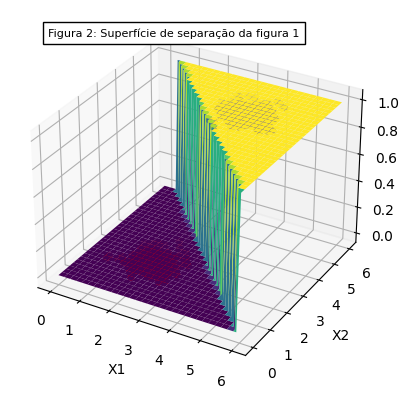

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xc1[:, 0], xc1[:, 1], zs=0, color='red', label='Class 1')
ax.scatter(xc2[:, 0], xc2[:, 1], zs=1, color='blue', label='Class 2')
ax.plot_surface(xgrid, ygrid, M, cmap='viridis')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Z')
ax.text(0, 0, 1.7, "Figura 2: Superfície de separação da figura 1", fontsize=8, bbox=dict(facecolor='white', edgecolor='black'))

Based on the line shown in the first figure, a separation surface is created as a binary classifier, where the region below the line has its z equal to zero and the region above the line has its z equal to one, from From this definition, the separation surface was created as shown above in figure 2.

In other words, for the equation ***𝑥2 = −𝑥1 + 6***, if the sum ***x1 + x2*** of the coordinates **(x1,x2)** of the sample were less than 6, there will be z=0, but if it is greater than 6, z=1

###Exercise 2


For this second exercise, the objective is practically the same as the first, with the difference that this time the solution line and the separation surface will be defined based on the training of a Perceptron network.

The exercise code was divided into 5 cells, the first being the *trainPerceptron* function that will be used to train the Perceptron network, the second cell is another function called yPerceptron that will be used to analyze the classification of the solution, followed by the third cell which is in fact the code used to train the perceptron, the fourth is responsible for the separation surface plot and, finally, the fifth and last cell is the weight vector w after training the network

In [ ]:
#Train Perceptron
def trainPerceptron(xin, yd, eta, tol, maxepocas, par):
    dimxin = xin.shape
    N = dimxin[0]
    n = dimxin[1]

    if par == 1:
        wt = np.random.rand(n + 1) - 0.5
        xin = np.hstack((np.ones((N, 1)), xin))
    else:
        wt = np.random.rand(n) - 0.5

    nepocas = 0
    eepoca = tol + 1

    evec = np.zeros(maxepocas)

    while nepocas < maxepocas and eepoca > tol:
        ei2 = 0
        xseq = np.random.permutation(N)

        for i in range(N):
            irand = xseq[i]
            yhati = 1.0 * np.dot(xin[irand, :], wt) >= 0
            ei = yd[irand] - yhati
            dw = eta * ei * xin[irand, :]
            wt = wt + dw
            ei2 += ei * ei

        nepocas += 1
        evec[nepocas - 1] = ei2 / N
        eepoca = evec[nepocas - 1]

    retlist = [wt, evec[:nepocas]]
    return retlist

In [ ]:
#Y Perceptron
def yPerceptron(xvec, w, par):
    if par == 1:
        xvec = np.hstack((np.ones((xvec.shape[0], 1)), xvec))
    u = np.dot(xvec, w)
    y = 1.0 * (u >= 0)
    return y

Text(3, 0.3, 'Figura 3: Reta definida pelo perceptron')

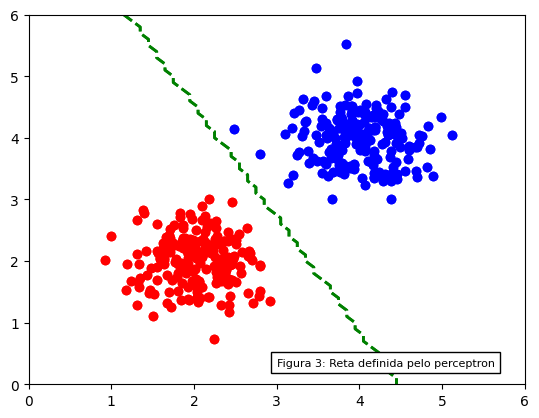

In [ ]:
xc1 = np.hstack((xc1, np.zeros((nc, 1))))
xc2 = np.hstack((xc2, np.ones((nc, 1))))
xin = np.vstack((xc1, xc2))

yc1_train = np.zeros((nc, 1))
yc2_train = np.ones((nc, 1))
yp = np.vstack((yc1_train, yc2_train))
retlist = trainPerceptron(xin[:, :2], yp, 0.1, 0.01, 100, 1)
w = retlist[0]
seqi = np.arange(0, 6.1, 0.1)
seqj = np.arange(0, 6.1, 0.1)

M = np.zeros((len(seqi), len(seqj)))

for ci, i in enumerate(seqi):
    for cj, j in enumerate(seqj):
        x = np.array([[i, j]])
        M[ci, cj] = yPerceptron(x, w, 1)

plt.scatter(xc1[:, 0], xc1[:, 1], color='red')
plt.scatter(xc2[:, 0], xc2[:, 1], color='blue')
plt.contour(seqi, seqj, M, levels=[0.5], colors='green', linestyles='dashed', linewidths=2)

plt.scatter(xc1[:, 0], xc1[:, 1], color='red')
plt.scatter(xc2[:, 0], xc2[:, 1], color='blue')
plt.contour(seqi, seqj, M, levels=[0.5], colors='green', linestyles='dashed', linewidths=2)

plt.text(3, 0.3, "Figura 3: Reta definida pelo perceptron", fontsize=8, bbox=dict(facecolor='white', edgecolor='black'))

As can be seen from the graph above, the straight line proved to be satisfactory in separating the samples above, it is notable that the blue samples are above the straight line and the red ones below it (as in figure 1), that is, this separation surface generated by the Percpetron trill also proves to be effective if the samples worked are taken into account


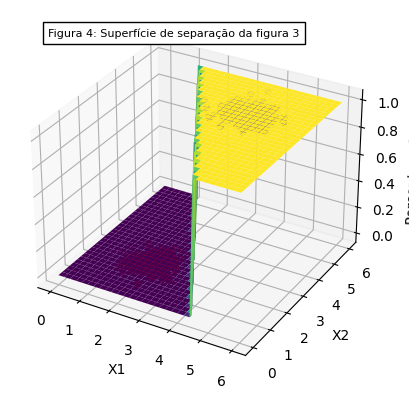

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xc1[:, 0], xc1[:, 1], zs=0, color='red', label='Class 1')
ax.scatter(xc2[:, 0], xc2[:, 1], zs=1, color='blue', label='Class 2')
xgrid, ygrid = np.meshgrid(seqi, seqj)
ax.plot_surface(xgrid, ygrid, M, cmap='viridis')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Perceptron Output')
ax.text(0, 0, 1.7, "Figura 4: Superfície de separação da figura 3", fontsize=8, bbox=dict(facecolor='white', edgecolor='black'))
plt.show()

Based on the straight line shown in figure 3, a separation surface is created as a binary classifier following the same line of reasoning as the separation surface in figure 2, for the equation ***𝑥2 = −𝑥1 + 6***, if the sum ***x1 + x2*** of the coordinates **(x1,x2)** of the sample were less than 6, it will have z=0, but if it is greater than 6, it will have z=1.

It is notable that, as in figure 2, no red sample was above the purple region (below the straight line) and no blue sample was below the yellow region (above the straight line).

In [ ]:
print(w)

[-1.18714566  0.14499551  0.26505158]


Finally, the value of the weight vector (w) was revealed after training the perceptron, which is [-1.18714566 0.14499551 0.26505158], differing greatly from the vector used in exercise 1, which was [1, 1, -6], however both solutions were satisfactory and there is not just one correct solution for this exercise, so much so that if the network is trained 10 times, the 10 solutions will probably be different straight lines and possibly all will be effective in solving the problem, the important thing in the end is to be able to create different regions to differentiate each type of sample, and for this it does not matter which straight line will be used.
